In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import skimage.io as io
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation
%matplotlib inline
import skimage
from skimage.util import img_as_ubyte
from sklearn.model_selection import train_test_split

In [ ]:

!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [ ]:
import os
import cv2

In [ ]:
image_path = "drive/MyDrive/JPMC_Quant_Dataset"
image_preProcessed = "drive/MyDrive/JPMC_PreProcessed"
image_train = "drive/MyDrive/JPMC_Train"
import tensorflow as tf

def loadImages(path):
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.png')])
    return image_files

In [ ]:
# Preprocessing
def processing(data):
  for i in data:
    img = io.imread(i, as_gray = True)
    #img = io.imread(i)
    threshold = threshold_otsu(img)
    img_binary = img > threshold
    kernel = np.ones((3,3), np.uint8)
    img_dilated = dilation(img_binary, kernel)

    img_eroded = erosion(img_dilated)

    kernel = np.ones((4,1), np.uint8)
    img_dilated_2 = dilation(img_eroded, kernel)
    file_name = os.path.basename(i)
    io.imsave(os.path.join(image_preProcessed, file_name), img_as_ubyte(img_dilated_2))
    #io.imsave(os.path.join(image_preProcessed, file_name),img_as_ubyte(img))

In [ ]:
#split each image into 5 images of 100*20 size, store the labels
def splitAndStore(data):
  i =0
  global y,f1,IMGX
  y=[]
  f1=[]
  IMGX=[]
  for j in data:
    img = io.imread(j, as_gray = True)
    start=0
    width = img.shape[1]
    cut = int(width)/5
    file_name = os.path.basename(j)
    f1.append(file_name)
    for k in [0,1,2,3,4]:
      img_cut = img[:, int(start):int(cut)]
      start+= width/5
      cut += width/5
      y+= file_name[k]
      ad = str(i) + ".png"
      io.imsave(os.path.join(image_train,ad), img_cut, check_contrast=False)
      IMGX.append(img_cut)
      i+=1



In [ ]:
def main():

  global image_path
  dataset = loadImages(image_path)

  processing(dataset)
  dataset_2 = loadImages(image_preProcessed)
  splitAndStore(dataset_2)

main()

In [ ]:
len(y)

5000

In [ ]:
np.array(IMGX[0]).shape
xc=np.reshape(IMGX[0],(1,2000))
for i in range(1,5000):
  xc1=np.reshape(IMGX[i],(1,2000))
  xc=np.vstack((xc,xc1))
xc.shape

(5000, 2000)

In [ ]:
import pandas as pd
pd.DataFrame(xc).to_csv('/content/drive/MyDrive/JPMC_input_image_data.csv')
pd.DataFrame(y).to_csv('/content/drive/MyDrive/JPMC_target.csv')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(xc, y, random_state=0, train_size = .80)
print(len(X_train), len(Y_train),len(X_test),len(Y_test))
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

4000 4000 1000 1000


In [ ]:
X_train.shape

(4000, 2000)

In [ ]:
print(np.unique(Y_train))
Y_train_int = []
for char in Y_train:
  Y_train_int.append(ord(char)-97)
Y_train_int = np.array(Y_train_int)
print(np.unique(Y_train_int))
Y_test_int=[]
for char in Y_test:
  Y_test_int.append(ord(char)-97)
Y_test_int = np.array(Y_test_int)


['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(max_iter=5000)
clf1
clf1.fit(X_train, Y_train_int)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [ ]:
##### Training Data Performance for Logistic Regression
from sklearn.metrics import classification_report
clr=classification_report(Y_train_int,clf1.predict(X_train))
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       160
           3       1.00      0.99      1.00       154
           4       1.00      1.00      1.00       159
           5       1.00      1.00      1.00       147
           6       1.00      1.00      1.00       151
           7       1.00      0.99      1.00       130
           8       1.00      1.00      1.00       136
           9       1.00      0.99      1.00       165
          10       1.00      1.00      1.00       152
          11       1.00      1.00      1.00       177
          12       1.00      1.00      1.00       168
          13       1.00      1.00      1.00       149
          14       1.00      1.00      1.00       155
          15       1.00      1.00      1.00       157
          16       1.00      1.00      1.00       140
          17       1.00    

In [ ]:
# Testing Data Performance for logistic Regression
from sklearn.metrics import classification_report
clr=classification_report(Y_test_int,clf1.predict(X_test))
print(clr)

              precision    recall  f1-score   support

           0       0.66      0.64      0.65        39
           1       0.40      0.55      0.47        31
           2       0.54      0.57      0.55        37
           3       0.39      0.57      0.47        35
           4       0.52      0.43      0.47        35
           5       0.51      0.47      0.49        49
           6       0.79      0.79      0.79        28
           7       0.66      0.61      0.63        41
           8       0.68      0.54      0.60        39
           9       0.64      0.69      0.67        39
          10       0.70      0.66      0.68        32
          11       0.39      0.50      0.44        28
          12       0.38      0.38      0.38        42
          13       0.52      0.32      0.40        50
          14       0.56      0.40      0.47        35
          15       0.63      0.53      0.58        32
          16       0.75      0.73      0.74        45
          17       0.63    

## SVM


In [ ]:
###### SVM
from sklearn.svm import SVC
clf2=SVC(kernel='rbf')
clf2
clf2.fit(X_train, Y_train_int)

SVC()

In [ ]:
##### Training Data Performance for SVM
from sklearn.metrics import classification_report
clr=classification_report(Y_train_int,clf2.predict(X_train))
print(clr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       163
           1       0.89      0.82      0.85       162
           2       0.82      0.80      0.81       160
           3       0.89      0.78      0.83       154
           4       0.93      0.90      0.92       159
           5       0.84      0.80      0.82       147
           6       0.99      0.91      0.95       151
           7       0.74      0.78      0.76       130
           8       0.94      0.68      0.79       136
           9       0.44      0.95      0.60       165
          10       0.85      0.84      0.84       152
          11       0.49      0.88      0.63       177
          12       0.82      0.83      0.82       168
          13       1.00      0.78      0.88       149
          14       0.89      0.76      0.82       155
          15       0.92      0.89      0.91       157
          16       0.94      0.86      0.90       140
          17       0.91    

In [ ]:
# Testing Data Performance for SVM
from sklearn.metrics import classification_report
clr=classification_report(Y_test_int,clf2.predict(X_test))
print(clr)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.61      0.74      0.67        31
           2       0.63      0.70      0.67        37
           3       0.71      0.69      0.70        35
           4       0.70      0.66      0.68        35
           5       0.70      0.61      0.65        49
           6       0.95      0.71      0.82        28
           7       0.67      0.68      0.67        41
           8       0.82      0.59      0.69        39
           9       0.38      0.85      0.52        39
          10       0.74      0.72      0.73        32
          11       0.29      0.71      0.42        28
          12       0.54      0.60      0.57        42
          13       0.77      0.48      0.59        50
          14       0.78      0.51      0.62        35
          15       0.68      0.84      0.75        32
          16       0.87      0.73      0.80        45
          17       0.85    

## Random Forest

In [ ]:
###### Random Forest
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier(n_estimators=2000)
clf3
clf3.fit(X_train, Y_train_int)

RandomForestClassifier(n_estimators=2000)

In [ ]:
##### Training Data Performance for RF
from sklearn.metrics import classification_report
clr=classification_report(Y_train_int,clf3.predict(X_train))
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       160
           3       1.00      0.99      1.00       154
           4       1.00      1.00      1.00       159
           5       1.00      1.00      1.00       147
           6       1.00      1.00      1.00       151
           7       1.00      0.99      1.00       130
           8       1.00      1.00      1.00       136
           9       1.00      0.99      1.00       165
          10       1.00      1.00      1.00       152
          11       1.00      1.00      1.00       177
          12       1.00      1.00      1.00       168
          13       1.00      1.00      1.00       149
          14       1.00      1.00      1.00       155
          15       1.00      1.00      1.00       157
          16       1.00      1.00      1.00       140
          17       1.00    

In [ ]:
# Testing Data Performance for RF
from sklearn.metrics import classification_report
clr=classification_report(Y_test_int,clf3.predict(X_test))
print(clr)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        39
           1       0.67      0.71      0.69        31
           2       0.70      0.62      0.66        37
           3       0.65      0.69      0.67        35
           4       0.68      0.71      0.69        35
           5       0.62      0.61      0.62        49
           6       0.96      0.79      0.86        28
           7       0.65      0.63      0.64        41
           8       0.69      0.56      0.62        39
           9       0.58      0.90      0.71        39
          10       0.74      0.78      0.76        32
          11       0.40      0.61      0.49        28
          12       0.59      0.62      0.60        42
          13       0.78      0.56      0.65        50
          14       0.74      0.57      0.65        35
          15       0.61      0.72      0.66        32
          16       0.83      0.76      0.79        45
          17       0.73    

Text(0.5, 1.0, 'Testing Performance Comparision')

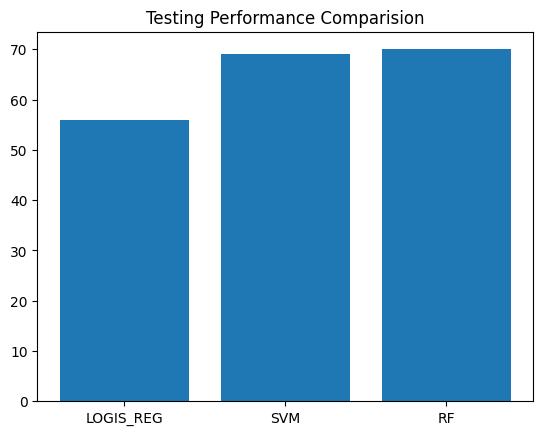

In [ ]:
clf_name=['LOGIS_REG','SVM','RF']
Testing_Perfo=[56,69,70]
plt.bar(clf_name,Testing_Perfo)
plt.title('Testing Performance Comparision')

# Answers

## Q1

We chose the Random Forest Classifier based on the initial assessment. This algorithm yielded the best accuracy on the validation set.


In [ ]:
print(accuracy_score(Y_test_int,clf2.predict(X_test))) #SVM
print(accuracy_score(Y_test_int,clf3.predict(X_test))) #Random Forest

0.692
0.695


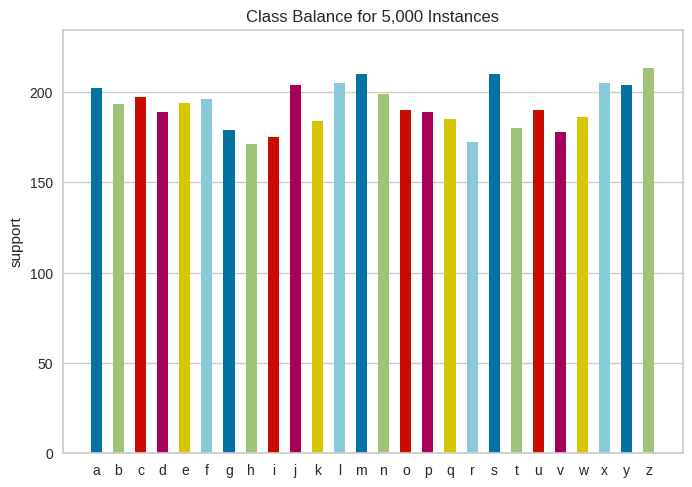

<Axes: title={'center': 'Class Balance for 5,000 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels= np.unique(np.array(y)))
visualizer.fit(np.array(y))
visualizer.show()

We see that the dataset contains a certain degree of class imbalance. Accuracy, in such a case will not take into account the number of correctly classified samples in each class. Monitoring precision and recall becomes important in such cases. Hence evaluation of a model's performance must be based on considering all these factors rather than accuracy alone. In certain classification problems, results belonging to a certain class may carry more weight - for example, the percentage of false negatives may be a more important consideration for problems in the field of medicine (recall has to be high here). Typically, a precision-recall tradeoff exists, and to optimize both factors the F1 score is calculated (a combination of precision and recall). Hence the F1 score (or precision and recall individually depending on the domain's need) and accuracy are to be analysed together.

## Q2
Algorithms like RandomizedSearchCV are present in order to identify the best combination of parameters for the model by iteratively fitting the model with different combinations and evaluating the accuracy. However, the computational load of this algorithm was high for our system. Hence we manually tweaked certain hyperparameters to identify the best combination.

We mainly tried different combinations for the n_estimators and max_depth parameters. A higher than required value of these parameters may cause overfitting leading to poor test performance. A lower than required value causes underfitting. Hence we vary the values of these parameters in both directions.


In [ ]:
print(accuracy_score(Y_test_int,clf3.predict(X_test)))

0.695


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf1=RandomForestClassifier(n_estimators=2000, max_depth=55)
clf_rf1
clf_rf1.fit(X_train, Y_train_int)
print(accuracy_score(Y_test_int,clf_rf1.predict(X_test)))

0.698


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf2=RandomForestClassifier(n_estimators=2000, max_depth=22)
clf_rf2
clf_rf2.fit(X_train, Y_train_int)
print(accuracy_score(Y_test_int,clf_rf2.predict(X_test)))

0.69


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf3=RandomForestClassifier(n_estimators=1500, max_depth=55)
clf_rf3
clf_rf3.fit(X_train, Y_train_int)
print(accuracy_score(Y_test_int,clf_rf3.predict(X_test)))

0.686


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf4=RandomForestClassifier(n_estimators=2000, max_depth=100)
clf_rf4
clf_rf4.fit(X_train, Y_train_int)
print(accuracy_score(Y_test_int,clf_rf4.predict(X_test)))

0.695


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf5=RandomForestClassifier(n_estimators=2500)
clf_rf5
clf_rf5.fit(X_train, Y_train_int)
print(accuracy_score(Y_test_int,clf_rf5.predict(X_test)))

0.691


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf6=RandomForestClassifier(n_estimators=2000, min_samples_split=3)
clf_rf6
clf_rf6.fit(X_train, Y_train_int)
print(accuracy_score(Y_test_int,clf_rf6.predict(X_test)))

0.692


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf7=RandomForestClassifier(n_estimators=2200)
clf_rf7
clf_rf7.fit(X_train, Y_train_int)
print(accuracy_score(Y_test_int,clf_rf7.predict(X_test)))

0.695


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf8=RandomForestClassifier(n_estimators=2000, max_depth=50)
clf_rf8
clf_rf8.fit(X_train, Y_train_int)
print(accuracy_score(Y_test_int,clf_rf8.predict(X_test)))

0.694


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf9=RandomForestClassifier(n_estimators=2000, max_depth=55,criterion='entropy')
clf_rf9
clf_rf9.fit(X_train, Y_train_int)
print(accuracy_score(Y_test_int,clf_rf9.predict(X_test)))

0.677


The accuracy does not improve by any significant amount on tweaking the hyperparameters as above. We see that n_estimators=2000, max_depth=55, with other parameters set to their default values gives the best results. n_estimators is increased from the default value, this increases the number of decision trees and thus improves performance. A deeper tree is more prone to overfitting and low depth causes underfitting, by experimentation we find the best value for max_depth to be 55. This gives an accuracy of 69.8%

## Q3
Precision, Recall, and F1 scores have been calculated in the performance report of each model (done above)

## Q4

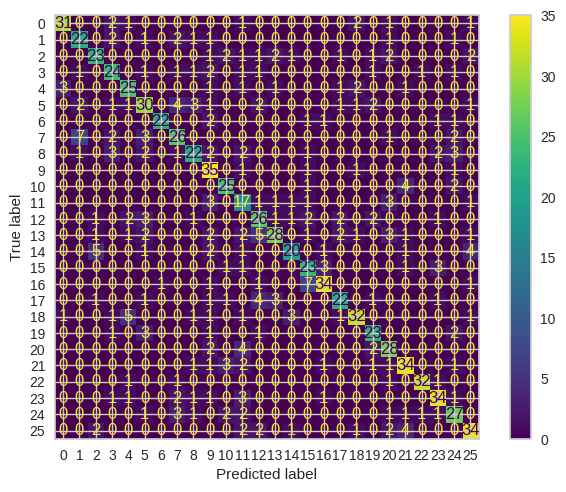

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test_int, clf3.predict(X_test), labels=clf3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf3.classes_)
disp.plot()
plt.show()

We see that prediction of 'l' has very low accuracy. This could be due to the fact that the main identifying feature of 'l', a vertical line, is a part of several other characters as well ('i', 'f', 'j', 'b','d').

Prediction of 'r' may have low accuracy due to the lower number of samples of 'r' present in the dataset.

Prediction of 'o' has low accuracy due to reasons similar to that of 'l'. The main feature, a circle, is a part of other characters like 'a', 'g', 'q'.

'b', 'g' and 'i' have low accuracy of prediction. There are lesser samples of 'g' and 'i' in the dataset in comparison to other characters which may have caused this. In cases where characters have similar features, the model usually favours the character with a higher number of samples (in the dataset) while predicting. \
The accuracy may be low here again due to reasons similar to that of 'l', for instance we see that 'b' and 'h' have a high degree of overlap, leading the model to possibly confuse one for the other. 'g', 'b' and 'o' have a similar circular feature.

## Q5
Bagging : Bagging and Random Forest are quite similar algorithms. They only differ at the node level spitting stage. Bagging uses all the features to decide the best split whereas Random Forest uses a random subset of features. Bagging does not seem to be effective in our case.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
clf4=BaggingClassifier(n_estimators=2000, base_estimator=None)
clf4
clf4.fit(X_train, Y_train_int)
print(accuracy_score(Y_test_int,clf4.predict(X_test)))

0.649


Tesseract OCR: The Tesseract OCR is Google's built in engine for OCR. It is the most powerful tool for performing OCR today.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [ ]:
dataset = loadImages(image_path)
image_path_in_colab=dataset[0]

extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

We can use techniques like data augmentation to increase the size of our dataset. This will improve the performance of the model. Deskew can also be done to correct the orientation of the sample images.